# chapter 9: 텍스트를 위한 인공 신경망

## 09 - 1 순차 데이터와 순환 신경망
한빛 마켓은 고객들의 상품을 분석하기로 했습니다. 김팀장은 혼공머신에게 또 한 번 큰 임무를 부탁합니다.  
"혼공머신, 딥러닝으로 댓글을 분석해서 평가가 긍정적인지 부정적인지 판단할 수 있을까?"  
"글을 분석하는 건 순환 신경망을 사용할 수 있을 거예요. 한번 해볼게요."


### 순차 데이터
__순차 데이터__ 는 텍스트나 __시계열 데이터__ 와 같이 순서에 의미가 있는 데이터를 말합니다. 지금까지 우리가 보았던 데이터는 순서와 상관이 없었습니다. 이 장에서 사용하려는 댓글, 즉 테스트 데이터는 단어의 수넛가 중요한 순차 데이터입니다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 합니다. 따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요합니다.  
완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없습니다. 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않습니다. 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 __피드포워드 신경망__ 이라고 합니다.  
신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로만 전달되어서는 곤란합니다.

### 순환 신경망
__순환 신경망__ 은 일반적인 완전 연결 신경망과 거의 비슷합니다. 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 됩니다.  
뉴런의 출력이 다시 자기 자신으로 전달됩니다. 즉 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 셈입니다.  
샘플을 처리하는 한 단계를 타임스텝이라고 말합니다. 순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해집니다.  
순환 신경망에서는 특별히 층을 __셀__ 이라고 부릅니다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현합니다. 또 셀의 출력을 __은닉 상태__ 라고 부릅니다. 일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 함수인 tanh^2가 많이 사용됩니다. tanh 함수는 시그모이드 함수와는 달리 -1 ~ 1 사이의 범위를 가집니다. 다른 신경망과 마찬가지로 순환 신경망 그림에도 번거로움을 피하기 위해 활성화 함수를 표시하지 않는 경우가 많습니다. 하지만 순환 신경망에도 활성화 함수가 반드시 필요하다는 것을 꼭 기억해 주세요. 합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱합니다. 순환 신경망에서도 동일합니다. 다만 순환 신경망의 뉴런은 가중치가 하나 더 있습니다. 바로 이전 타임스텝의 은닉 상태에 곱해지는 가중치입니다. 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만듭니다. 맨 처음 타입스텝 1에서 사용되는 이전 은닉 상태 h_0은 어떻게 구할 수 있나? 맨 처음 샘플을 입력할 때는 이전 타임스텝이 없기에 간단히 h_0은 모두 0으로 초기화합니다.

### 셀의 가중치와 입출력
순환 신경망의 셀에서 필요한 가중치 크기를 계산해보겠음. 복잡한 모델을 배울수록 가중치 개수를 계산해 보면 잘 이해하고 있는지 알 수 있음. 예를 들어 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정. 먼저 w_x(입력층에서 순환층으로 가는 가중치)의 크기는 4 * 3 = 12. 그럼 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 w_b의 크기는 첫번째 은닉 상태가 다음 타임스텝에 재사용될 때 1, 2, 3 뉴런에 하나씩 줄수 있기에 3. 이러한 은닉상태가 3개이 있기에 3 * 3 = 9. 가중치는 모두 구했으니 모델 파라미터 개수를 계산해볼려면 절편을 더하면 됨. 12 + 9 + 3 = 24개.  
이번에는 순환층의 입력과 출력에 대해 생각해 보죠. 이전 장에서 배웠던 합성곱 층의 입력은 전형적으로 하나의 샘플이 3개의 차원을 가집니다. 너비, 높이, 채널. 입력이 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널 (혹은 깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지되었습니다.  
순환층은 일반적으로 샘플마다 2개의 차원을 가집니다. 보통 하나의 샘플을 하나의 시퀀스라고 말합니다. 여기에서 시퀀스의 길이가 바로 타임 스텝의 길이가 됩니다. (순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냄.) 그리고 합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요가 없음. 셀의 출력을 그대로 밀집층에 사용할 수 있음.

## 09 - 2 순환 신경망으로 IMDB 리뷰 분류하기
이번 절에서는 대표적인 순환 신경망 문제인 IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신경망 모델을 훈련해 보겠습니다.  
이 데이터셋을 두가지 방법으로 변형하여 순환 신경망에 주입해 보겠습니다. 하나는 원-핫 인코딩이고 또 다른 하나는 단어 임베딩입니다.  
먼저 이 절에서 사용할 IMDB 리뷰 데이터셋을 적재해 보겠습니다.

### IMDB 리뷰 데이터셋
IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋입니다. 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터가 각각 25,000개씩 나누어져 있습니다.  
##### 여기서 잠깐! 자연어 처리와 말뭉치란 무엇일까요?
__자연어 처리__ 는 컴퓨터를 사용해 인간의 언어를 처리하는 분야. 대표적인 세부 분야로는 음성 인식, 기계 번역, 감성 분석 등이 있습니다. 자연어 처리 분야에서는 훈련 데이터를 종종 __말뭉치__ 라고 부릅니다.

사실 텍스트 자체를 신경망에 전달하지는 않습니다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터. 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것입니다. 단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없습니다. 정숫값 사이에는 어떤 관계도 없습니다. 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리합니다. 이렇게 분리된 단어를 __토큰__ 이라고 부릅니다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스텝에 해당합니다.

##### 여기서 잠깐! 한글 문장은 어떻게 토큰을 분리하나요?
한글은 조사가 발달되어 있기 때문에 공백으로 나누는 것만으로는 부족합니다. 일반적으로 한글은 형태소 분석을 통해 토큰을 만듭니다.

토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많습니다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타냅니다.

##### 여기서 잠깐! 어휘 사전은 또 뭐죠?
훈련 세트에서 고유한 단어를 뽑아 만든 목록을 어휘 사전이라고 합니다. 예를 들어 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입합니다.

실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있습니다. tensorflow.keras.datasets 패키지 아래 imdb 모듈을 임포트하여 이 데이터를 적재해 보겠습니다. 여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용하겠습니다.

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

먼저 훈련 세트와 테스트 세트의 크기를 확인해 보겠습니다.

In [31]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


배열이 1차원인 게 이상하게 보이지요? IMDB 리뷰 텍스트는 길이가 제각각입니다. 따라서 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있습니다. 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열입니다. 넘파이 배열은 정수나 실수 외에도 파이썬 객체를 담을 수 있습니다. 그럼 다음과 같이 첫 번째 리뷰의 길이를 출력해 보겠습니다.

In [32]:
print(len(train_input[0]))

218


첫 번째 리뷰의 길이는 218개의 토큰으로 이루어져 있습니다. 두 번째 리뷰의 길이를 확인해 보겠습니다.

In [33]:
print(len(train_input[1]))

189


이제 첫 번째 리뷰에 담긴 내용을 출력해 보죠.

In [34]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있습니다. 앞서 num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있습니다. 따라서 어휘 사전에 없는 단어는 모두 2로 표시되어 나타납니다.

##### 여기서 잠깐! 어떤 기준으로 500개의 단어를 고른 것인가요?
imdb.load_data() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 500개의 단어를 선택합니다.

이번에는 타깃 데이터를 출력해 보겠습니다.

In [35]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지를 판단하는 겁니다. 그러면 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)로 나누어집니다.  
데이터를 더 살펴보기 전에 훈련 세트에서 검증 세트를 떼어 놓도록 하죠. 원래 훈련 세트의 크기가 25,000개였으므로 20%를 검증 세트로 떼어 놓으면 훈련 세트의 크기는 20,000개로 줄어들 것입니다.

In [36]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

이제 훈련 세트에 대해 몇 가지 조사를 하겠습니다. 먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담겠습니다. 이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 길이의 리뷰를 확인하고 싶기 때문입니다. 이를 위해 넘파이 리스트 내포를 사용해 train_input의 원소를 순회하면서 길이를 재도록 하겠습니다.

In [37]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

lengths 배열이 준비되었으므로 넘파이 mean() 함수와 median() 함수를 사용해 리뷰의 길이의 평균과 중간값을 구해 보겠습니다.

In [38]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개이고 중간값은 178인 것으로 보아 이 리뷰 길이 데이터는 한쪽에 치우친 분포를 보일 것 같습니다. lengths 배열을 히스토그램으로 표현해 보겠습니다.

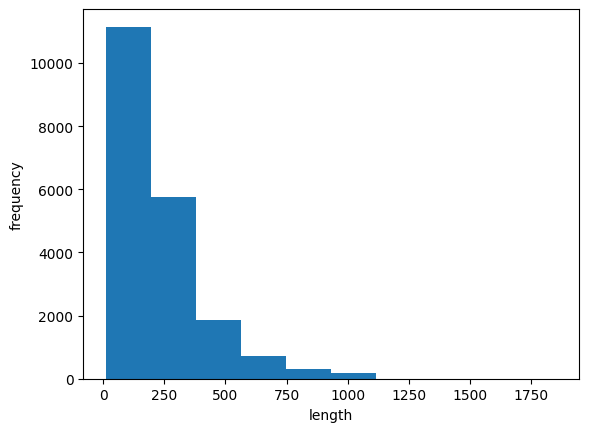

In [39]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

역시 한쪽으로 치우쳤군요. 대부분의 리뷰 길이는 300 미만입니다. 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문입니다. 어떤 리뷰는 1,000개의 단어를 넘기기도 하는군요!  
리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용하겠습니다. 하지만 여전히 100개의 단어보다 작은 리뷰가 있습니다. 이런 리뷰들의 길이를 100에 맞추기 위해 패딩이 필요합니다. 보통 패딩을 나타내는 토큰으로는 0을 사용합니다.  
물론 수동으로 훈련 세트에 있는 20,000개의 리뷰를 순회하면서 길이가 100이 되도록 잘라내거나 0으로 패딩할 수 있습니다. 하지만 자주있는 번거로운 작업에는 항상 편리한 도구가 준비되어 있죠.  
케라스는 시퀀스 데이터의 길이를 맞추는 pad_sequences() 함수를 제공합니다. 이 함수를 사용해 train_input의 길이를 100으로 맞추어 보겠습니다.

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

사용법은 maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩합니다.

In [41]:
print(train_seq.shape)

(20000, 100)


train_input은 파이썬 리스트의 배열이었지만 길이를 100으로 맞춘 train_seq는 이제 (20000, 100) 크기의 2차원 배열이 되었습니다. train_seq에 있는 첫 번째 샘플을 출력해 보겠습니다.

In [42]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


이 샘플의 앞뒤에 패딩값이 0이 없는 것으로 보아 100보다는 길었을 것 같습니다. 그럼 원래 샘플의 앞부분이 잘렸을까요? 뒷부분이 잘렸을까요? 원본 샘플의 끝을 확인해보죠.

In [43]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


음수 인덱스와 슬라이싱을 사용해 train_input[0]에 있는 마지막 10개의 토큰을 출력했습니다. train_seq[0]의 출력값과 비교하면 정확히 일치합니다. 그렇다면 샘플의 앞부분이 잘렸다는 것을 짐작할 수 있습니다.  
pad_sequences() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자릅니다. 이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문입니다.   
리뷰 끝에 뭔가 결정적인 소감을 말할 가능성이 높다고 볼 수 있습니다. 만약 시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequences() 함수의 truncating 매개변수의 값을 기본값인 'pre'가 아닌 'post'로 바꾸면 됩니다. 이번에는 train_seq에 있는 여섯 번째 샘플을 출력해 보겠습니다.

In [44]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안되겠군요. 그럼 이런 방식대로 검증 세트의 길이도 100으로 맞추어 보죠.

In [45]:
val_seq = pad_sequences(val_input, maxlen=100)

이제 훈련 세트와 검증 세트 준비를 마쳤습니다. 이제 본격적으로 순환 신경망 모델을 만들어 보겠습니다.

### 순환 신경망 만들기
케라스는 여러 종류의 순환층 클래스를 제공합니다. 그 중에 가장 간단한 것은 SimpleRNN 클래스 입니다. IMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용해야 합니다. 먼저 케라스의 Sequential 클래스로 만든 신경망 코드를 살펴보죠.

In [46]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

첫 번째 매개변수에는 사용할 뉴런의 개수를 지정하고, input_shape에 입력 차원을 (100, 500)으로 지정했습니다. 첫 번째 차원이 100인 것은 앞에서 샘플의 개수를 100으로 지정했기 때문입니다. 순환층도 당연히 활성화 함수를 사용해야 합니다. SimpleRNN 클래스의 activation 매개변수의 기본값은 'tanh'로 하이퍼볼릭 탄젠트 함수를 사용합니다. 여기서는 기본값을 그대로 사용합니다.  
그럼 input_shape의 두 번째 차원인 500은 어디서 온 숫자일까요? 이전 섹션에서 만든 train_seq와 val_seq에는 한가지 문제가 발생. 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들기 때문입니다. 분명히 이 정수 사이에는 어떤 관련이 없습니다. 따라서 단순한 정숫값을 신경망에 입력하기 위해 정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법은 7장에서 잠깐 보았던 원-핫 인코딩입니다. imdb.load_data() 함수에서 500개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 500개. 따라서 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 합니다.  
케라스는 이미 원-핫 인코딩을 위한 유틸리티를 제공합니다. 이 유틸리티는 바로 keras.utils 패키지 아래에 있는 to_categorical() 함수. 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환해줌.

In [47]:
train_oh = keras.utils.to_categorical(train_seq)

먼저 train_seq를 원-핫 인코딩으로 변환하여 train_oh 배열을 만들었습니다. 배열의 크기를 출력해보겠습니다.

In [48]:
print(train_oh.shape)

(20000, 100, 500)


정수 하나마다 모두 500차원의 배열로 변경되었기 때문에 (20000, 100) 크기의 train_seq가 (20000, 100, 500) 크기의 train_oh로 바뀌었습니다.  
train_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩되었는지 출력해 보죠.

In [49]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


처음 12개 원소를 출력해 보면 열한 번째 원소가 1인 것을 확인할 수 있습니다. 나머지 원소는 모두 0일까요? 넘파이 sum() 함수로 모든 원소의 값을 더해서 1이 되는지 확인.

In [50]:
print(np.sum(train_oh[0][0]))

1.0


같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸어 놓겠습니다.

In [51]:
val_oh = keras.utils.to_categorical(val_seq)

이제 훈련에 사용할 훈련 세트와 검증 세트가 모두 준비되었습니다. 앞서 만든 모델의 구조를 출력해보죠.

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SimpleRNN에 전달할 샘플의 크기는 (100, 500)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력합니다. 이 때문에 출력 크기가 순환층의 뉴런 개수와 동일화 8임을 확인할 수 있습니다.  
순환층에 사용된 모델 파라미터의 개수를 계산해 보죠. 입력 토큰은 500차원의 원-핫 인코딩 배열입니다. 이 배열이 순환층의 뉴런 8개와 완전히 연결되기 때문에 총 500 x 8 = 4,000개의 가중치가 있습니다. 순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해집니다. 이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉 상태 크기) x 8(뉴런 개수) =
64개의 가중치가 필요합니다. 마지막으로 뉴런마다 하나의 절편이 있습니다. 따라서 모두 4,000 + 64 + 8= 4,072개의 모델 파라미터가 필요합니다.  
케라스 API를 사용해 순환 신경망 모델을 손쉽게 만들었습니다. 이전에 만들었던 완전 연결 신경망에 비해 크게 바뀐 것은 없습니다. Dense 층 대신에 SimpleRNN 층을 사용했고 입력 데이터의 차원을 원-핫 인코딩으로 바꾸어 주었습니다. 다음 섹션에서 이 순환 신경망 모델을 훈련해 보겠습니다.

### 순환 신경망 훈련하기
순환 신경망의 훈련은 완전 연결 신경망이나 합성곱 신경망과 크게 다르지 않습니다. 모델을 만드는 것은 달라도 훈련하는 방법은 모두 같습니다. 이것이 케라스 API를 사용하는 장점이죠. 다음 코드처럼 모델을 컴파일하고 훈련하는 전체 구조가 동일합니다. 이 예에서는 기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도의 RMSprop 객체를 만들어 학습률을 0.0001로 지정하였습니다. 그다음 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정했습니다. 그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일합니다.

In [53]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6967 - accuracy: 0.5012 - val_loss: 0.6934 - val_accuracy: 0.5162
Epoch 2/100
 12/313 [>.............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5195

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 14ms/step - loss: 0.6942 - accuracy: 0.5099 - val_loss: 0.6923 - val_accuracy: 0.5188
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6922 - accuracy: 0.5179 - val_loss: 0.6912 - val_accuracy: 0.5260
Epoch 4/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6905 - accuracy: 0.5243 - val_loss: 0.6902 - val_accuracy: 0.5294
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6890 - accuracy: 0.5324 - val_loss: 0.6892 - val_accuracy: 0.5324
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6874 - accuracy: 0.5392 - val_loss: 0.6882 - val_accuracy: 0.5348
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6859 - accuracy: 0.5458 - val_loss: 0.6872 - val_accuracy: 0.5400
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6843 - accuracy: 0.5536 - val_loss: 0.6860 - val_accuracy: 0.5468
Epoc

이전 장에서처럼 훈련 손실과 검증 손실을 그래프로 그려서 훈련 과정을 살펴보겠습니다.

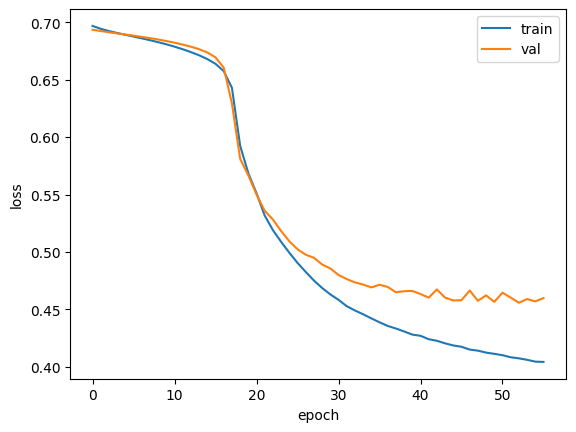

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실은 꾸준히 감소하고 있지만 검증 손실은 대략 서른 번째 에포크에서 감소가 둔해지고 있습니다. 적절한 에포크에서 훈련을 멈춘 것 같네요. 네, 성공입니다. 1절에서 배운 순환 신경망을 성공적으로 훈련시켜서 IMDB 리뷰 데이터를 긍정과 부정으로 분류하는 작업을 수행했습니다.
여기서 한 가지 생각할 점이 있습니다. 이 작업을 하기 위해서 입력 데이터를 원-핫 인코딩으로 변환 했습니다. 원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것입니다. 실제로 train seq 배열 과 train oh 배열의 nbytes 속성을 출력하여 크기를 확인해 보세요.  
토큰 1개를 500차원으로 늘렸기 때문에 대략 500배가 커집니다! 이는 썩 좋은 방법은 아닌 것 같군요. 훈련 데이터가 커질수록 더 문제가 될 것입니다. 다음 섹션에서 순환 신경망에 사용하는 더 좋은 단어 표현 방법을 알아보도록 하겠습니다.

### 단어 임베딩을 사용하기
순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 __단어 임베딩 word embeddimng__ 입니다. 단어 임 베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 줍니다.  
이런 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많습니다. 물론 이런 단어 임베딩 벡터를 만드는 층은 이미 준비되어 있습니다. 케라스에서는 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능을 제공합니다. 이 클래스를 다른 충처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습합니다.
단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것입니다. 즉 원-핫 인코딩으로 변경된 train oh 배열이 아니라 train seq를 사용할 수 있습니다. 이 때문에 메모리를 훨씬 효율적으로 사용할 수 있습니다. 앞서 원-핫 인코딩은 샘플 하나를 500차원으로 늘렸기 때문에 (100, ) 크기의 샘플이 (100, 500)
으로 커졌습니다. 이와 비슷하게 임베딩도 (100, ) 크기의 샘플을 (100, 20)과 같이 2차원 배열로 늘립니다. 하지만 원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있습니다. Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망을 만들어 보겠습니다.

In [55]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

Embedding 클래스의 첫 번째 매개변수(500)는 어휘 사전의 크기입니다. 앞서 IMDB 리뷰 데이터셋에서 500개의 단어만 사용하도록 imdb.load_data (num_ words=500)과 같이 설정했기 때문에 이 매개변수의 값을 500으로 지정합니다. 두 번째 매개변수(16)는 임베딩 벡터의 크기입니다. 여기에서는 원-핫 인코딩보다 훨씬 작은 크기 (16)의 벡터를 사용했습니다. 세 번째 input_length 매개변수는 입력 시퀀스의 길이입니다. 앞서 샘플의 길이를 100으로 맞추어 train_seq를 만들었습니다. 따라서 이 값을 100으로 지정합니다. 그다음 SimpleRNN층과 Dense 층은 이전과 동일합니다. 이 모델의 구조를 출력해 보죠.

In [56]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


summary() 메서드의 출력에서 알 수 있듯이 이 모델은 (100, ) 크기의 입력을 받아 (100, 16) 크기의 출력을 만듭니다. 이 모델에서 사용되는 모델 파라미터 개수를 계산해 보죠. Embedding 클래스는 500개의 각 토큰을 크기가 16인 벡터로 변경하기 때문에 총 500 x 16 = 8,000개의 모델 파라미터를 가집니다. 그다음 SimpleRNN층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16 x 8 = 128개를 가집니다. 또한 은닉 상태에 곱해지는 가중치 8 x 8 = 64개가 있습니다. 마지막으로 8개의 절편이 있으므로 이 순환층에 있는 전체 모델 파라미터의 개수는 128 + 64 + 8 = 200개입니다. 마지막 Dense 층의 가중치 개수는 이전과 동일하게 9개입니다. 원-핫 인코딩보다 SimpleRNN에 주입되는 입력의 크기가 크게 줄었지만 임베딩 벡터는 단어를 잘 표현하는 능력이 있기 때문에 훈련 결과는 이전에 못지않을 것입니다. 모델 훈련 과정은 이전과 동일합니다.

In [57]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6852 - accuracy: 0.5497 - val_loss: 0.6591 - val_accuracy: 0.6278
Epoch 2/100
 34/313 [==>...........................] - ETA: 1s - loss: 0.6529 - accuracy: 0.6452

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 5ms/step - loss: 0.6322 - accuracy: 0.6735 - val_loss: 0.6082 - val_accuracy: 0.7054
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5816 - accuracy: 0.7279 - val_loss: 0.5656 - val_accuracy: 0.7368
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5369 - accuracy: 0.7584 - val_loss: 0.5257 - val_accuracy: 0.7602
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5033 - accuracy: 0.7749 - val_loss: 0.5041 - val_accuracy: 0.7686
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 0.4773 - accuracy: 0.7880 - val_loss: 0.4798 - val_accuracy: 0.7826
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 0.4619 - accuracy: 0.7928 - val_loss: 0.4763 - val_accuracy: 0.7776
Epoch 8/100
313/313 [==============================] - 2s 5ms/step - loss: 0.4531 - accuracy: 0.7979 - val_loss: 0.4733 - val_accuracy: 0.7776
Epoch 9/100

출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈습니다. 반면에 순환충의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어들었습니다. 마지막으로 훈련 손실과 검증 손실을 그래프로 출력해 보겠습니다.

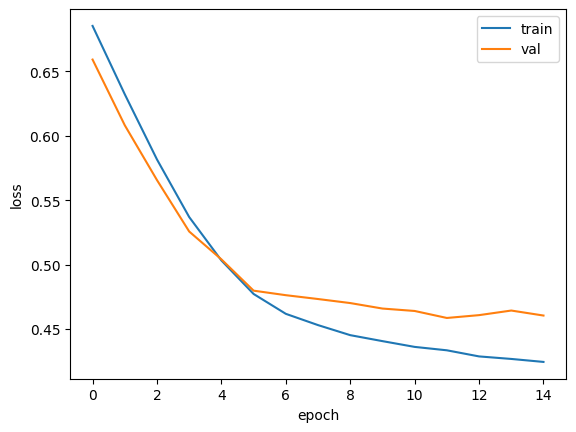

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

네, 검증 손실이 더 감소되지 않아 훈련이 적절히 조기 종료된 것 같습니다. 이에 비해 훈련 손실은 계속 감소합니다. 이를 더 개선할 방법이 있는지 다음 절에서 알아보겠습니다.

## 09 - 3 LSTM과 GRU 셀
이 절에서는 고급 순환층인 LSTM과 GRU에 대해 알아보겠습니다. 이런 층들은 2절에서 배웠던 SimpleRNN보다 계산이 훨씬 복잡합니다. 하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택되고 있습니다. 일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵습니다. 시퀸스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문입니다. 따라서 멀리 떨어져 있는 단어 정보를 인식하는 데 어려울 수 있습니다. 이를 위해 ISTM과 GRU 셀이 발명되었습니다. 이 절에서는 ISTM과 GRU 셀의 구조를 이해하고 텐서플로와 케라스를 사용해 다양한 순환 신경망 구조를 만들어 보겠습니다.

### LSTM 구조
LSTM은 Long Short-Term Memory의 약자입니다. 말 그대로 단기 기억을 오래 기억하기 위해 고안되었습니다. LSTM은 구조가 복잡하므로 단계적으로 설명하겠습니다. 하지만 기본 개념은 동일합니다. LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있습니다. 이런 계산 결과는 다음 타임스텝에 재사용됩니다. 이 과정을 하나씩 따라가 보죠. 먼저 은닉 상태를 만드는 방법을 알아보죠. 은닉 상태는 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듭니다. 이때 기본 순환충과는 달리 시그모이드 활성화 함수를 사용합니다. 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듭니다. 이 값은 잠시 후에 설명하겠습니다.  

이 그림에는 편의상 은닉 상태를 계산할 때 사용하는 가중치 W_x 와 W_h 를 통틀어 W_o 라고 표시했습니다. 파란색 원은 tanh 함수를 나타내고 주황색 원은 시그모이드 함수를 나타냅니다. x는 곱셈을 나타냅니다. 여기까지는 괜찮네요. 기본 순환층과 크게 다르지 않습니다. 그럼 tanh 함수를 통과하는 값이 무엇인지 알아보죠. LSTM에는 순환되는 상태가 2개입니다. 은닉 상태 말고 __셀 상태__ 라고 부르는 값이 또 있죠. 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTN 셀에서 순환만 되는 값입니다. 다음 그림에 초록색으로 순환되는 셀 상태가 표시되어 있습니다.  

셀 상태를 은닉 상태 h와 구분하여 C로 표시했습니다. 셀 상태를 계산하는 과정은 다음과 같습니다. 먼저 입력과 은닉 상태를 또 다른 가중치 w_f에 곱한 다음 시그모이드 함수를 통과시킵니다. 그다음 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듭니다. 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여합니다. 와우, 복잡하군요. ISTM은 마치 작은 셀을 여러 개 포함하고 있는 큰 셀 같습니다. 중요한 것은 입력과 은닉 상태에 곱해지는 가중치 W_o 와 W_f가 다르다는 점입니다. 이 두 작은 셀은 각기 다른 기능을 위해 훈련됩니다. 그런데 LSTM 셀은 이게 끝이 아닙니다!
여기에 2개의 작은 셀이 더 추가되어 셀 상태를 만드는 데 기여합니다.  

이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음, 하나는 시그모이드 함수를 통과시키고 다른 하나는 tanh 함수를 통과시킵니다. 그다음 두 결과를 곱한 후 이전 셀 상태와 더합니다. 이 결과가 최종적인 다음 셀 상태가 됩니다.  

다음 그림처럼 세 군데의 곱셈을 왼쪽부터 차례대로 삭제 게이트, 입력 게이트, 출력력 케이트라고 부릅니다.
삭제 게이트는 셀 상태에 있는 정보를 제거하는 역할을 하고 입력 게이트는 새로운 정보를 셀 상태에 추가합니다. 출력 게이트를 통해서 이 셀 상태가 다음 은닉 상태로 출력됩니다. 물론 이 복잡한 셀 계산을 직접 할 필요는 없습니다. 케라스에는 이미 LSTM 클래스가 준비되어 있습니다. 다음 색션에서 ISTM 클래스를 사용해 LSTM 순환 신경망을 만들어 보겠습니다.

### LSTM 신경망 훈련하기
먼저 이전 절에서처럼 IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트로 나눕니다.

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

그다음 케라스의 pad_sequences() 함수로 각 샘플의 길이를 100에 맞추고 부족할 때는 패딩을 추가합니다.

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

이제 LSTM 셀을 사용한 순환층을 만들어 보겠습니다. 사실 SimpleRNN 클래스를 LSTM 클래스로 바꾸기만 하면 됩니다.

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

모델 구조를 출력하겠습니다.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SimpleRNN 클래스의 모델 파라미터 개수는 200개 였습니다. LSTM 셀에는 작은 셀이 4개 있으므로 정확히 4배가 늘어 모델 파라미터 개수는 800개가 되었습니다. 모델을 컴파일하고 훈련해 보겠습니다. 이전과 마찬가지로 배치 크기는 64개, 에포크 횟수는 100으로 지정합니다. 체크포인트와 조기 종료를 위한 코드도 동일합니다.

In [64]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6883 - accuracy: 0.6195 - val_loss: 0.6854 - val_accuracy: 0.6276
Epoch 2/100
 10/313 [..............................] - ETA: 3s - loss: 0.6827 - accuracy: 0.6578

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.6752 - accuracy: 0.6689 - val_loss: 0.6593 - val_accuracy: 0.6800
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5997 - accuracy: 0.7161 - val_loss: 0.5630 - val_accuracy: 0.7248
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5432 - accuracy: 0.7403 - val_loss: 0.5347 - val_accuracy: 0.7438
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5163 - accuracy: 0.7596 - val_loss: 0.5144 - val_accuracy: 0.7524
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4960 - accuracy: 0.7700 - val_loss: 0.4933 - val_accuracy: 0.7778
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4794 - accuracy: 0.7832 - val_loss: 0.4809 - val_accuracy: 0.7836
Epoch 8/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4664 - accuracy: 0.7911 - val_loss: 0.4716 - val_accuracy: 0.7836
Epoc

훈련 손실과 검증 손실 그래프를 그려보겠습니다.

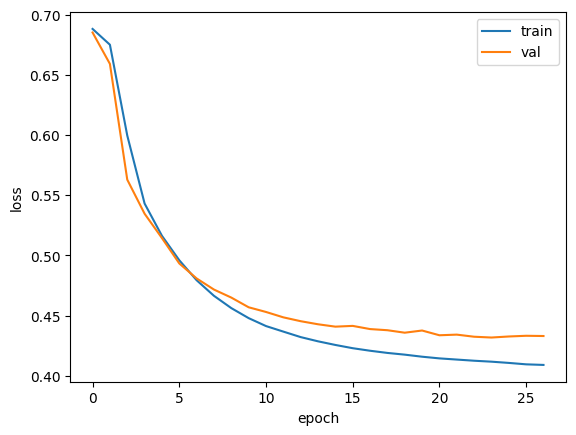

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

그래프를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행한 것으로 보입니다.
하지만 경우에 따라서는 과대적합을 더 강하게 제어할 필요가 있습니다. 7장에서 배웠던 드롭아웃을 순환층에도 적용할 수 있을까요? 다음 색션에서 이에 대해 알아보겠습니다.

### 순환층에 드롭아웃 적용하기
완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해 드롭아웃을 적용했습니다. 이를 통해 모델이 훈련 세트에 너무 과대적합되는 것을 막았죠. 순환층은 자체적으로 드롭아웃 기능을 제공합니다. SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있습니다. (드롭아웃은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법입니다.) dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용합니다. 하지만 기술적인 문제로 인해 recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못합니다. 이 때문에 모델의 훈련 속도가 크게 느려집니다. 따라서 여기에서는 dropout만을 사용해 보겠습니다. 전체적인 모델 구조는 이전과 동일합니다. ISTM 클래스에 dropout 매개변수를 0.3으로 지정하여 30%의 입력을 드롭아웃 합니다.

In [66]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

이 모델을 이전과 동일한 조건으로 훈련해 보죠.

In [67]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6926 - accuracy: 0.5331 - val_loss: 0.6921 - val_accuracy: 0.5520
Epoch 2/100
 18/313 [>.............................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5790

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.6905 - accuracy: 0.5830 - val_loss: 0.6894 - val_accuracy: 0.6060
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6862 - accuracy: 0.6237 - val_loss: 0.6836 - val_accuracy: 0.6320
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6766 - accuracy: 0.6485 - val_loss: 0.6694 - val_accuracy: 0.6586
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6441 - accuracy: 0.6744 - val_loss: 0.6060 - val_accuracy: 0.7016
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5745 - accuracy: 0.7264 - val_loss: 0.5576 - val_accuracy: 0.7410
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5412 - accuracy: 0.7466 - val_loss: 0.5265 - val_accuracy: 0.7558
Epoch 8/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5156 - accuracy: 0.7585 - val_loss: 0.5042 - val_accuracy: 0.7668
Epoc

검증 손실이 약간 향상된 것 같네요. 훈련 손실과 검증 손실 그래프를 그려 보겠습니다.

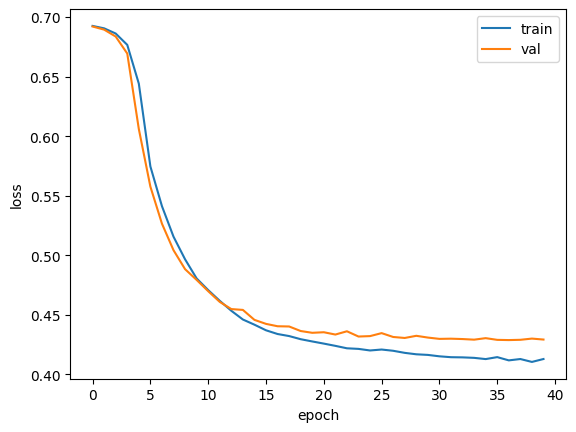

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

네. LSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같습니다. 훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인할 수 있습니다.
밀집층이나 합성곱 층처럼 순환층도 여러 개를 쌓지 않을 이유가 없습니다. 다음 섹션에서 2개의 순환층을 연결한 모델을 훈련해 보죠.

### 2개의 층을 연결하기
순환층을 연결할 때는 한 가지 주의할 점이 있습니다. 앞서 언급했지만 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달합니다.하지만 순환층을 쌓게 되면 모든 순환 층에 순차 데이터가 필요합니다. 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 합니다. 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 합니다. 1절에서 보았던 그림을 기억해 보세요! 케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정하면 됩니다. 다음의 코드를 확인해 보세요.

In [7]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

2개의 LSTM 층을 쌓았고 모두 드롭아웃을 0.3으로 지정했습니다. 그리고 첫 번째 LSTM 클래스에는 return_sequences 매개변수를 True로 지정한 것을 볼 수 있습니다. summary() 메서드의 결과를 확인해 보죠.

In [8]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력 크기가 (None, 100, 8)로 표시되었습니다. 이에 반해 두 번째 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None, 8)입니다.  
이 모델을 앞에서와 같이 훈련해 보겠습니다.

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 35ms/step - loss: 0.6917 - accuracy: 0.5511 - val_loss: 0.6896 - val_accuracy: 0.5974
Epoch 2/100
  5/313 [..............................] - ETA: 10s - loss: 0.6893 - accuracy: 0.5750

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 36ms/step - loss: 0.6801 - accuracy: 0.6302 - val_loss: 0.6610 - val_accuracy: 0.6714
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6103 - accuracy: 0.6905 - val_loss: 0.5618 - val_accuracy: 0.7270
Epoch 4/100
313/313 [==============================] - 10s 34ms/step - loss: 0.5512 - accuracy: 0.7291 - val_loss: 0.5326 - val_accuracy: 0.7456
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5234 - accuracy: 0.7492 - val_loss: 0.5094 - val_accuracy: 0.7546
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5040 - accuracy: 0.7632 - val_loss: 0.4914 - val_accuracy: 0.7684
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.4914 - accuracy: 0.7692 - val_loss: 0.4812 - val_accuracy: 0.7770
Epoch 8/100
313/313 [==============================] - 11s 34ms/step - loss: 0.4804 - accuracy: 0.7766 - val_loss: 0.4779 - val_accuracy: 0.77

모델이 잘 훈련된 것 같네요. 일반적으로 순환층을 쌓으면 성능이 높아집니다. 이 예에서 그리 큰 효과를 내지 못했네요. 손실 그래프를 그려서 과대적합이 잘 제어됬는지 확인해 보겠습니다.

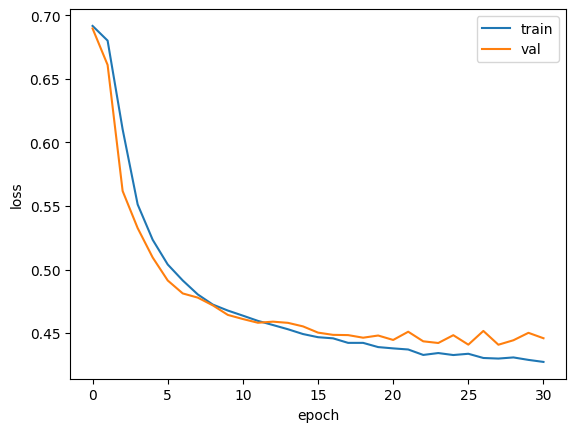

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

그래프를 보면 과대적합을 제어하면서 손실을 최대한 낮춘 것 같습니다. 지금까지 LSTM 셀을 사용한 훈련과 드롭아웃을 적용해 보았고 2개의 층을 쌓은 순환 신경망을 만들어 보았습니다. 다음 섹션에서는 유명한 또 다른 셀인 GRU 셀에 대해 알아보겠습니다.

### GRU 구조
GRU는 Gated Recurrent Unit의 약자입니다. 뉴욕 대학교 조경현 교수가 발명한 셀로 유명합니다. 이 셀은 LSTM을 간소화한 버전으로 생각할 수 있습니다. 이 셀은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있습니다. GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있습니다. 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용합니다. 여기에서도 은닉 상태와 입력에 곱해지는 가중치를 합쳐서 나타냈습니다. 맨 왼쪽에서 W_z를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행합니다.
이와 똑같은 출력을 1에서 뺀 다음에 가장 오른쪽 W_g를 사용하는 셀의 출력에 곱합니다. 이는 입력 되는 정보를 제어하는 역할을 수행합니다. 가운데 W_r을 사용하는 셀에서 출력된 값은 W_g 셀이 사용할 은닉 상태의 정보를 제어합니다.
GRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 내는 것으로 알려져 있습니다. 다음 색션에서 GRU 셀을 사용한 순환 신경망을 만들어 보겠습니다.

### GRU 신경망 훈련하기


In [11]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

LSTM 클래스를 GRU 클래스로 바꾼 것 외에는 이전 모델과 동일합니다. 이 모델의 구조를 확인해보죠.

In [12]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


GRU 층의 모델 파라미터 개수를 계산해 보겠습니다. GRU 셀에는 3개의 작은 셀이 있습니다. 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있습니다. 입력에 곱하는 가중치는 16 × 8 = 128개이고 은닉 상태에 곱하는 가중치는 8 x 8 = 64개입니다. 그리고 절편은 뉴런마다 하나씩이므로 8개입니다. 모두 더하면 128 + 64 + 8 = 200개입니다. 이런 작은 셀이 3개이므로 모두 600개 의 모델 파라미터가 필요합니다. 어, 그런데 summary() 메서드의 출력은 624개네요. 무엇이 잘못 되었을까요?  

사실 텐서플로에 기본적으로 구현된 GRU 셀의 계산은 앞의 그림과 조금 다릅니다. GRU 셀의 초기 버전은 다음 그림과 같이 계산됩니다. 538쪽의 그림과 다른 점을 비교해 보세요. 달라지는 부분은 G로 표시된 작은 셀에 들어가는 입력 부분입니다. 이전에는 가운데 셀의 출력과 은닉 상태가 곱해진 후 G 셀에 입력되었습니다. 하지만 바뀐 그림에서는 은닉 상태가 먼저 가중치와 곱해진 다음 가운데 셀의 출력과 곱해집니다. 그래서 이전에는 입력과 은닉 상태에 곱해지는 가중치를 W_g로 별도로 표기했는데 이 그림에서는 W_x와 w_h로 나누었습니다.
이렇게 나누어 계산하면 은닉 상태에 곱해지는 가중치 외에 절편이 별도로 필요합니다. 따라서 작은 셀마다 하나씩 절편이 추가되고 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해집니다. 따라서 GRU 층의 총 모델 파라미터 개수는 624개가 됩니다.  

텐서플로가 이런 계산 방식을 사용하는 이유는 GRU를 잘 활용하기 위해서입니다. 하지만 대부분 GRU 셀을 소개할 때는 전자의 그림을 사용합니다. 널리 통용되는 이론과 구현이 차이나는 경우가 종종있습니다. 이로 인해 GRU 층의 모델 파라미터 개수를 혼동하지 마세요! 좋습니다. 그럼 GRU 셀을 사용한 순환 신경망을 훈련해 보죠. 역시 훈련 방법은 이전과 동일합니다.

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 20ms/step - loss: 0.6925 - accuracy: 0.5247 - val_loss: 0.6914 - val_accuracy: 0.5576
Epoch 2/100
 10/313 [..............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5437

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 19ms/step - loss: 0.6901 - accuracy: 0.5659 - val_loss: 0.6887 - val_accuracy: 0.5886
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6863 - accuracy: 0.5914 - val_loss: 0.6840 - val_accuracy: 0.6036
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6799 - accuracy: 0.6151 - val_loss: 0.6766 - val_accuracy: 0.6150
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6696 - accuracy: 0.6317 - val_loss: 0.6650 - val_accuracy: 0.6328
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6536 - accuracy: 0.6480 - val_loss: 0.6467 - val_accuracy: 0.6482
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6286 - accuracy: 0.6687 - val_loss: 0.6175 - val_accuracy: 0.6722
Epoch 8/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5864 - accuracy: 0.6978 - val_loss: 0.5671 - val_accuracy: 0.7146
Epoc

출력 결과에서 볼 수 있듯이 LSTM와 거의 비슷한 성능을 냅니다. 이 모델의 손실을 그래프로 그려서 확인해 보죠.

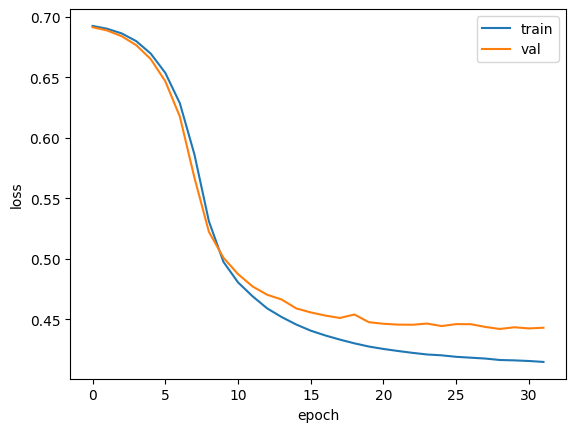

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃을 사용하지 않았기 때문에 이전보다 훈련 손실과 검증 손실 사이에 차이가 있지만 훈련 과정이 잘 수렴되고 있는 것을 확인할 수 있습니다. 축하합니다! 순환 신경망에서 가장 인기 있는 LSTM와 GRU 셀을 사용해 성공적으로 훈련시켰습니다!

### LSTM과 GRU 셀로 훈련
이 절에서는 순환 신경망에서 가장 인기 있는 LSTM과 GRU 셀에 대해 배웠습니다. 또 순환층에 드롭아웃을 적용해 보았고 2개의 순환층을 쌓는 방법에 대해 알아보았습니다. 이제 가장 좋았던 2개의 순환층을 쌓은 모델을 다시 로드하여 테스트 세트에 대한 성능을 확인해 보겠습니다. 먼저 테스트 세트를 훈련 세트와 동일한 방식으로 변환합니다. 그다음 load_model() 함수를 사용해 best-2rnn-model.h5 파일을 읽고 evaluate() 메서드로 테스트 세트에서 성능을 계산합니다.

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4357 - accuracy: 0.7971


[0.43574202060699463, 0.7970799803733826]

이 모델은 드롭아웃을 적용하여 과대적합을 잘 억제했기 때문에 테스트 세트의 성능이 검증 세트와 크게 차이 나지 않는 것 같군요.  
성공입니다. 이제 댓글을 긍정과 부정으로 분류할 수 있다는 멋진 보고서를 작성하기만 하면 됩니다!